In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import os
from astropy.table import Table
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler
import ml_algorithims as ml
import matplotlib.pyplot as plt
from mlxtend.regressor import StackingCVRegressor
import random
from scipy.constants import pi
from scipy import stats
import metrics

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
vipers = Table.read("../data/vipers.fits").to_pandas()
vipers.sample(5)

,ID,RA_1,DEC_1,z,z_Err,flag,source,comments,totobs,totexp,...,SPREADERR_MODEL_R,SPREADERR_MODEL_I,SPREADERR_MODEL_Z,SPREADERR_MODEL_Y,WAVG_SPREADERR_MODEL_G,WAVG_SPREADERR_MODEL_R,WAVG_SPREADERR_MODEL_I,WAVG_SPREADERR_MODEL_Z,WAVG_SPREADERR_MODEL_Y,random
43362,b'VIPERS 122062799',33.153602,-4.385853,1.0720,-9.999,b' 9.5',b'VIPERS',b'-',-9,-9,...,0.003328,0.003288,0.003750,0.009998,0.005576,0.003240,0.003123,0.004286,-99.000000,0.412399
2020,b'VIPERS 102156572',31.489449,-5.785433,1.0074,-9.999,b' 3.5',b'VIPERS',b'-',-9,-9,...,0.003014,0.002058,0.002165,0.005510,-99.000000,0.003444,0.002436,0.002442,-99.000000,0.234532
3564,b'VIPERS 116013778',36.761442,-5.555954,0.7988,-9.999,b' 4.5',b'VIPERS',b'-',-9,-9,...,0.000719,0.000886,0.001181,0.007518,0.000850,0.000754,0.000854,0.001169,-99.000000,0.204459
24769,b'VIPERS 114079813',34.587112,-5.286254,0.5338,-9.999,b' 4.4',b'VIPERS',b'-',-9,-9,...,0.000521,0.000470,0.000680,0.002308,0.001184,0.000603,0.000528,0.000729,0.002084,0.040033
5932,b'VIPERS 110170045',30.684354,-4.836141,0.8885,-9.999,b' 2.5',b'VIPERS',b'-',-9,-9,...,0.002976,0.002867,0.004714,0.012038,0.003942,0.002824,0.002846,0.005773,-99.000000,0.752082


In [3]:
feat = ['MAG_AUTO_G','MAG_AUTO_R','MAG_AUTO_I','MAG_AUTO_Z','MAG_AUTO_Y',
        'MAG_AUTO_G_DERED','MAG_AUTO_R_DERED','MAG_AUTO_I_DERED','MAG_AUTO_Z_DERED','MAG_AUTO_Y_DERED',
        "WAVG_MAG_PSF_G","WAVG_MAG_PSF_R","WAVG_MAG_PSF_I","WAVG_MAG_PSF_Z","WAVG_MAG_PSF_Y"
       ,'WAVG_MAG_PSF_G_DERED','WAVG_MAG_PSF_R_DERED','WAVG_MAG_PSF_I_DERED','WAVG_MAG_PSF_Z_DERED','WAVG_MAG_PSF_Y_DERED']


In [4]:
vipers.loc[vipers[feat[0]]==99,feat[0]] = vipers[vipers[feat[0]]!=99][feat[0]].max()
vipers.loc[vipers[feat[1]]==99,feat[1]] = vipers[vipers[feat[1]]!=99][feat[1]].max()
vipers.loc[vipers[feat[2]]==99,feat[2]] = vipers[vipers[feat[2]]!=99][feat[2]].max()
vipers.loc[vipers[feat[3]]==99,feat[3]] = vipers[vipers[feat[3]]!=99][feat[3]].max()
vipers.loc[vipers[feat[4]]==99,feat[4]] = vipers[vipers[feat[4]]!=99][feat[4]].max()
vipers.loc[vipers[feat[5]]>90,feat[5]] = vipers[vipers[feat[5]]<90][feat[5]].max()
vipers.loc[vipers[feat[6]]>90,feat[6]] = vipers[vipers[feat[6]]<90][feat[6]].max()
vipers.loc[vipers[feat[7]]>90,feat[7]] = vipers[vipers[feat[7]]<90][feat[7]].max()
vipers.loc[vipers[feat[8]]>90,feat[8]] = vipers[vipers[feat[8]]<90][feat[8]].max()
vipers.loc[vipers[feat[9]]>90,feat[9]] = vipers[vipers[feat[9]]<90][feat[9]].max()
vipers.loc[vipers[feat[10]]>90,feat[10]] = vipers[vipers[feat[10]]<90][feat[10]].max()
vipers.loc[vipers[feat[11]]>90,feat[11]] = vipers[vipers[feat[11]]<90][feat[11]].max()
vipers.loc[vipers[feat[12]]>90,feat[12]] = vipers[vipers[feat[12]]<90][feat[12]].max()
vipers.loc[vipers[feat[13]]>90,feat[13]] = vipers[vipers[feat[13]]<90][feat[13]].max()
vipers.loc[vipers[feat[14]]>90,feat[14]] = vipers[vipers[feat[14]]<90][feat[14]].max()
vipers.loc[vipers[feat[15]]>90,feat[15]] = vipers[vipers[feat[15]]<90][feat[15]].max()
vipers.loc[vipers[feat[16]]>90,feat[16]] = vipers[vipers[feat[16]]<90][feat[16]].max()
vipers.loc[vipers[feat[17]]>90,feat[17]] = vipers[vipers[feat[17]]<90][feat[17]].max()
vipers.loc[vipers[feat[18]]>90,feat[18]] = vipers[vipers[feat[18]]<90][feat[18]].max()
vipers.loc[vipers[feat[19]]>90,feat[19]] = vipers[vipers[feat[19]]<90][feat[19]].max()

In [5]:
X, y = ml.get_features_targets_des2(vipers)

#X_res, y_res = ml.smote(X,y,20000,3)



X_train, X_test, y_train, y_test = ml.tts_split(X, y, 0.3, 5)



In [6]:
tree = []
alg = ["Boost","Hist"]
for i in range(5):
    tree.append(ml.random_DTR(4,random.choice(alg)))
tree

[AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_features='auto',
                                                        min_samples_leaf=38,
                                                        min_samples_split=38),
                   learning_rate=1e-11, loss='exponential', n_estimators=600),
 AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                        max_features='log2',
                                                        min_samples_leaf=40,
                                                        min_samples_split=86,
                                                        splitter='random'),
                   learning_rate=1e-16, loss='square', n_estimators=900),
 HistGradientBoostingRegressor(l2_regularization=1e-05, learning_rate=1e-11,
                               max_depth=5, max_iter=700, min_samples_leaf=60),
 HistGradientBoostingRegressor(l2_regularization=1e-05, learning_ra

In [7]:
stacked = StackingCVRegressor(regressors=(tree[0:-1]),
                            meta_regressor=tree[-1],
                            use_features_in_secondary=False,cv = 5,n_jobs = 3)

In [8]:
stacked.fit(X_train,y_train)

StackingCVRegressor(meta_regressor=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                                                          max_features='auto',
                                                                                          min_samples_leaf=84),
                                                     learning_rate=0.001,
                                                     n_estimators=200),
                    n_jobs=3,
                    regressors=[AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_features='auto',
                                                                                       min_samples_leaf=38,
                                                                                       min_samples_split=38),
                                                  learning_rate=1e-1...
                                                                                       

In [9]:
pred1 = stacked.predict(X_test)
print(" Stacked averaged base models score: ROOT MAE {:5.4f} MSE ({:5.4f})\n".format(ml.rmsle(pred1,y_test), mean_squared_error(pred1,y_test)))

 Stacked averaged base models score: ROOT MAE 0.1282 MSE (0.0164)



In [10]:
test_predictions = stacked.predict(X_test).flatten()

In [11]:
redshift = pd.DataFrame()
redshift["z_phot"] = test_predictions
redshift["z_spec"] = y_test

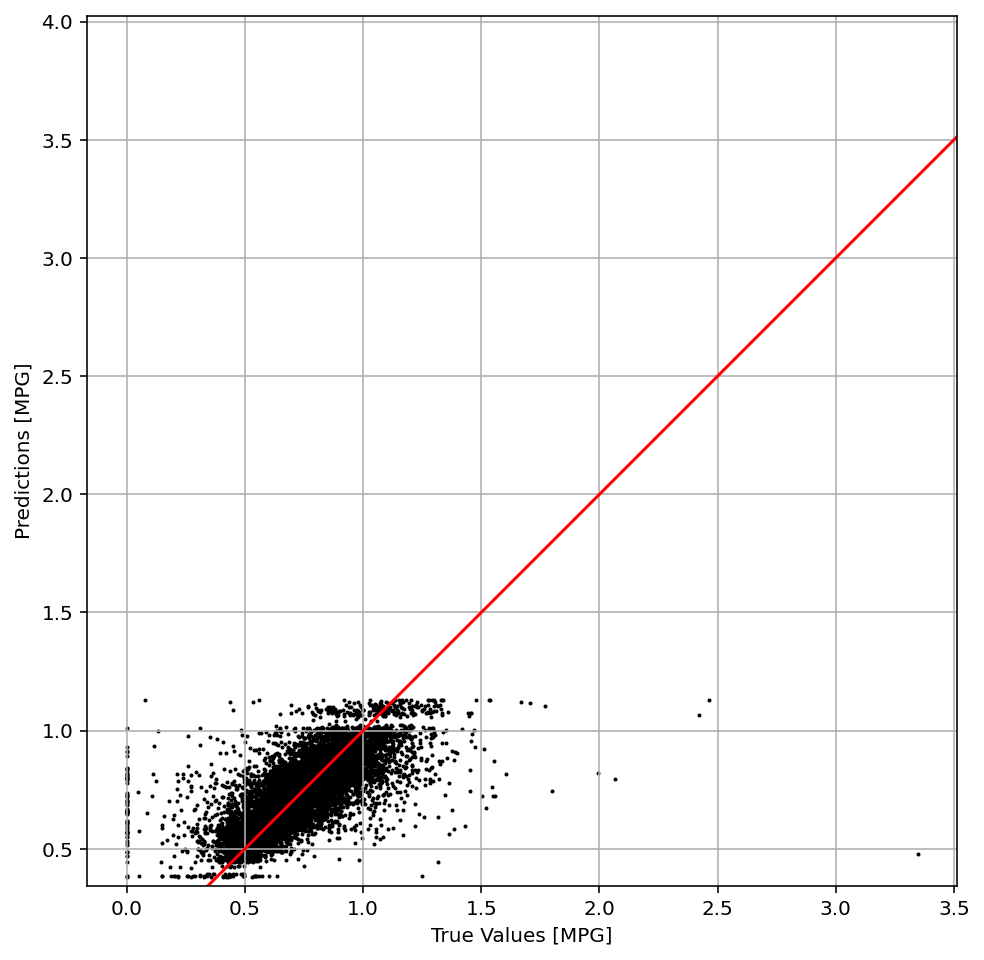

In [12]:
plt.figure(figsize=(16, 8))
plt.scatter(y_test, test_predictions, s=1, c="k")
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.grid()
_ = plt.plot([-100, 100], [-100, 100],color = "red")
#plt.show()
plt.savefig("plots/scatter_bdt.png",dpi = 300)
#plt.close()


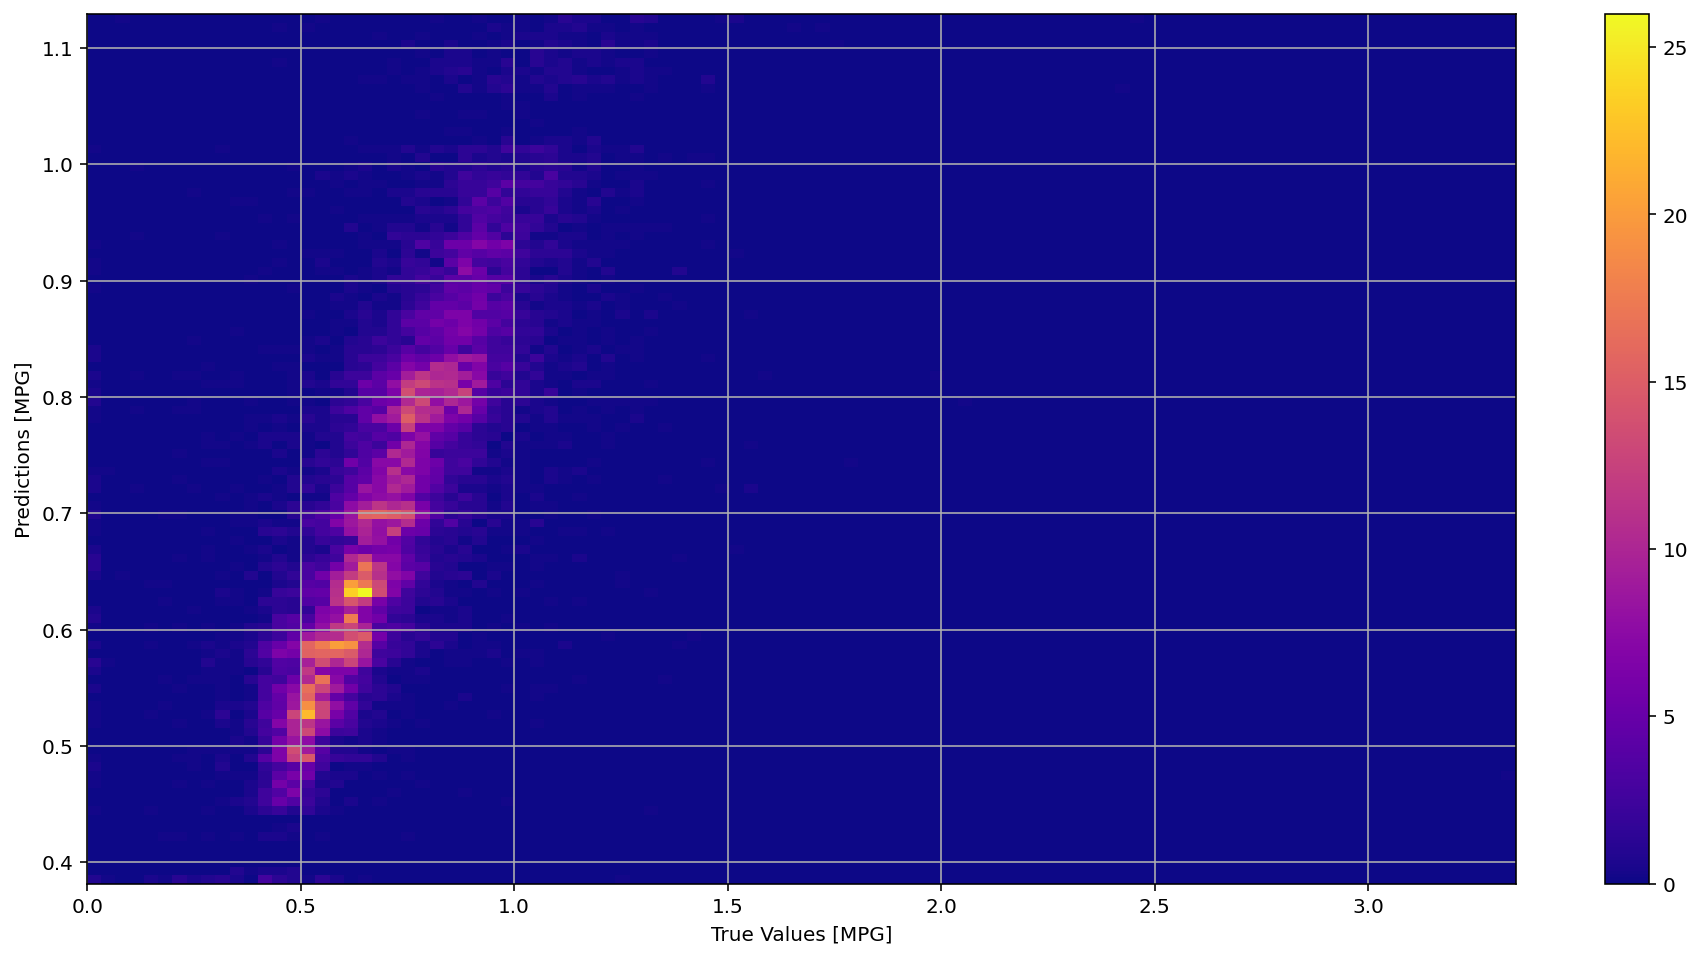

In [13]:
plt.figure(figsize=(16, 8))
plt.hist2d(y_test,test_predictions, bins= 100,density=True,cmap = "plasma")
plt.colorbar()
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.grid()
#plt.show()
plt.savefig("plots/bdt_hist2d.png")
#plt.close()


In [14]:
error = (test_predictions - y_test)

In [15]:
redshift ["error"] = error 

In [16]:
sigma68 = (int(len(error)*0.159),int(len(error)*(1-0.159)))
sigma68

(2273, 12024)

In [17]:
err = np.sort(error)

In [18]:
sigma68 = (int(len(err)*0.159),int(len(err)*(1-0.159)))

print("$\sigma_{68}$ error is ", err[sigma68[0]],err[sigma68[1]])

$\sigma_{68}$ error is  -0.08417266979813576 0.0888626998040214


In [19]:
sigma68_arr = err[2273:12024]

In [20]:
x = np.array(range(0,20+1))*5
x[0]=1

ind = x*len(error)//100

In [21]:
zphot = redshift["z_phot"].values

Text(0, 0.5, 'Error')

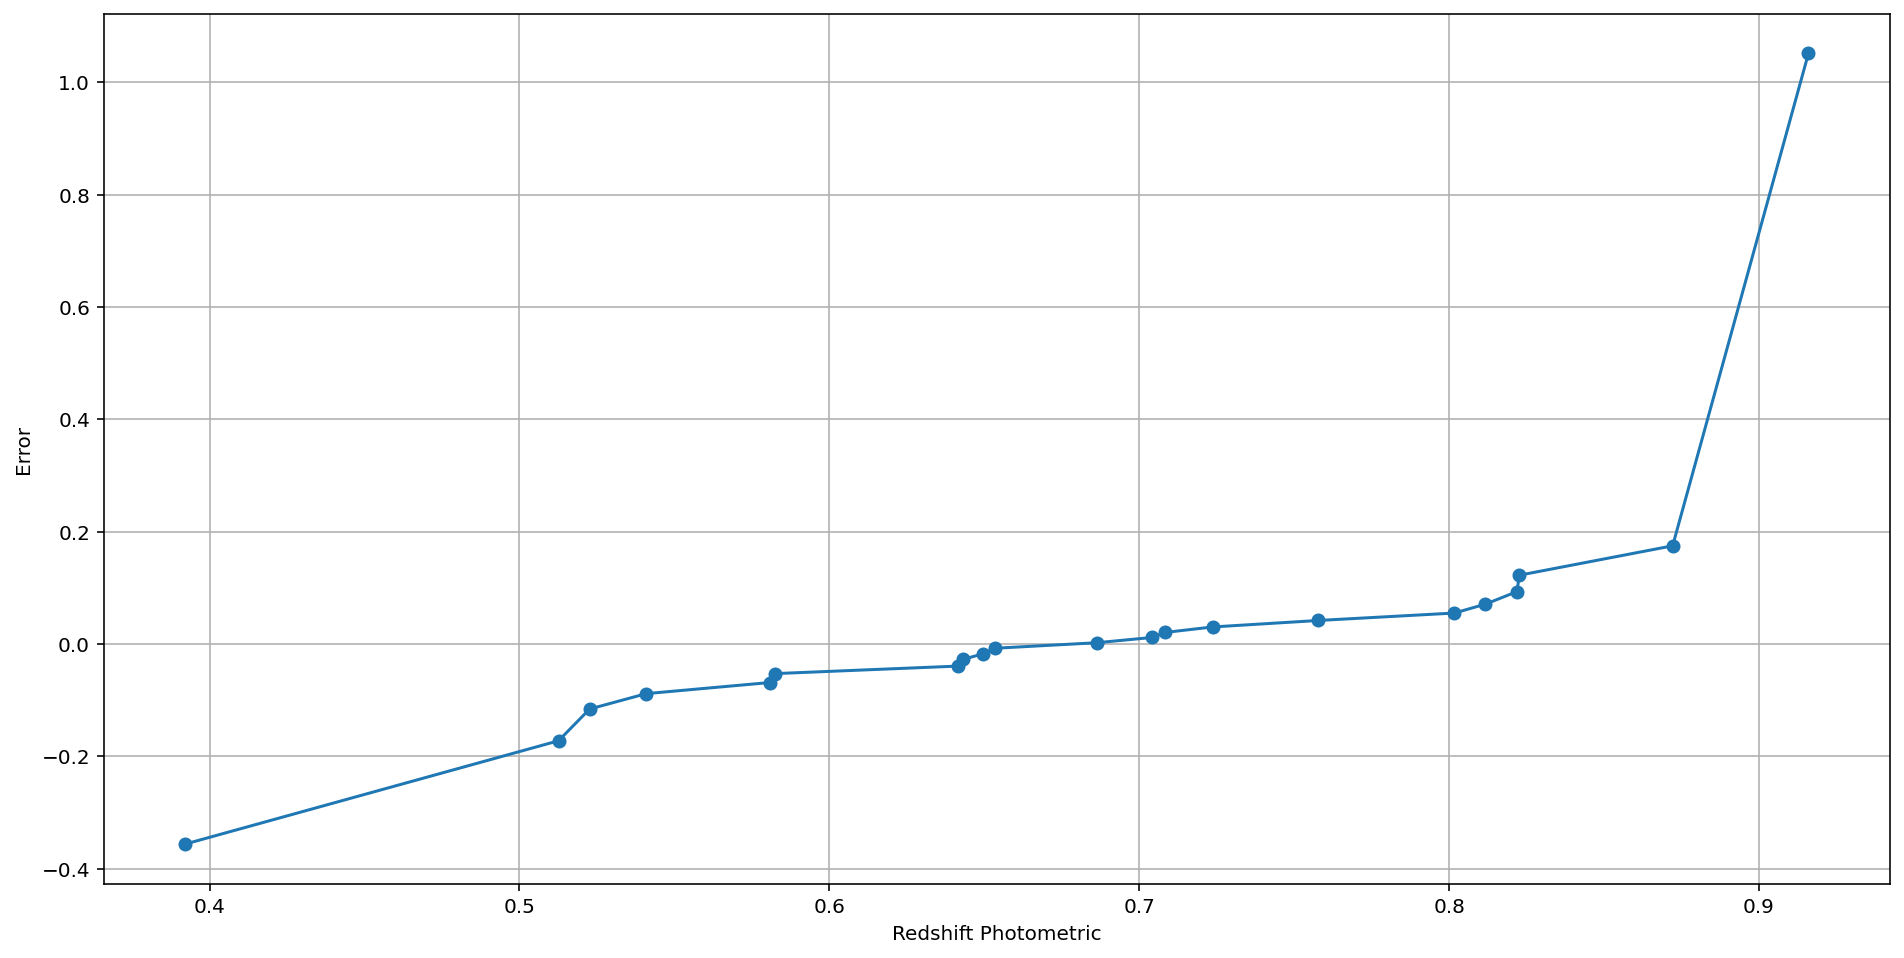

In [22]:
plt.figure(figsize = (16,8))
plt.plot(np.sort(zphot[ind-1]),err[ind-1],'o-')
#plt.scatter(test.z_phot[ind-1],test.error[ind-1],s = 10, c = "red")
plt.grid()
plt.xlabel("Redshift Photometric")
plt.ylabel("Error")


In [23]:
x = np.array(range(0,20+1))*5
x[0]=1

ind = x*len(sigma68_arr)//100

Text(0, 0.5, '$\\sigma_{68}$')

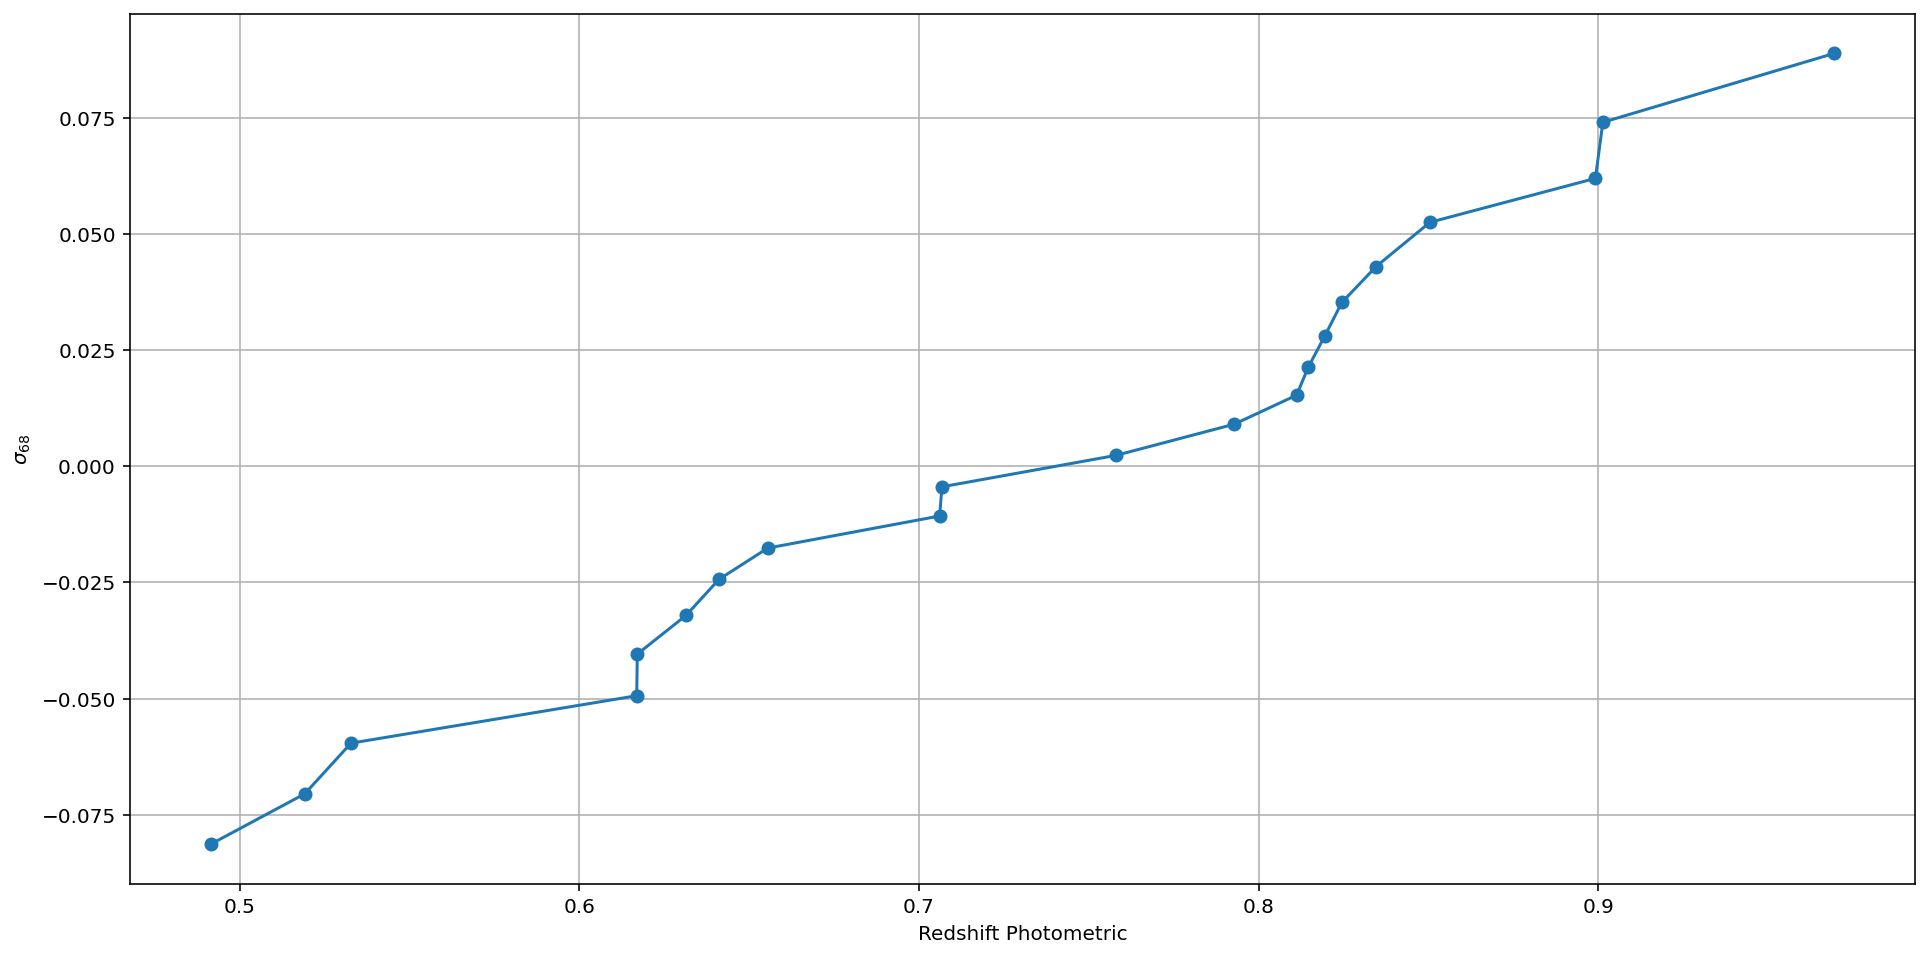

In [24]:
plt.figure(figsize = (16,8))
plt.plot(np.sort(zphot[ind-1]),sigma68_arr[ind-1],'o-')
#plt.scatter(test.z_phot[ind-1],test.error[ind-1],s = 10, c = "red")
plt.grid()
plt.xlabel("Redshift Photometric")
plt.ylabel("$\sigma_{68}$")


In [25]:
result = metrics.compute_metrics(redshift["z_spec"].values,zphot,"bdt-rafael")

In [26]:
result.to_frame()

,bdt-rafael
RMSE_znorm,0.083154
bias_znorm,0.007336
std_znorm,0.082830
RMSE,0.128206
|znorm| > 0.15 (%),4.007554
|znorm| > 3std (%),1.342845
scatter,0.048572
bias,0.048572
